## II. Programming

### 1)

In [1]:
import warnings
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif

warnings.filterwarnings("ignore", category=FutureWarning)


data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Hernia'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Hernia'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Hernia'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Hernia'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Hernia'


In [2]:
X = df.drop('class', axis=1)
y = df['class']
y = y.astype(str)

fimportance = f_classif(X, y)

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'F-Score': fimportance[0]})

index_of_highest_fscore = feature_importance_df['F-Score'].idxmax()
index_of_lowest_fscore = feature_importance_df['F-Score'].idxmin()

highest_feature = feature_importance_df.iloc[index_of_highest_fscore]
lowest_feature = feature_importance_df.iloc[index_of_lowest_fscore]

print("Feature with Highest F-Score:")
print(highest_feature)

print("\nFeature with Lowest F-Score:")
print(lowest_feature)

Feature with Highest F-Score:
Feature    degree_spondylolisthesis
F-Score                  119.122881
Name: 5, dtype: object

Feature with Lowest F-Score:
Feature    pelvic_radius
F-Score        16.866935
Name: 4, dtype: object


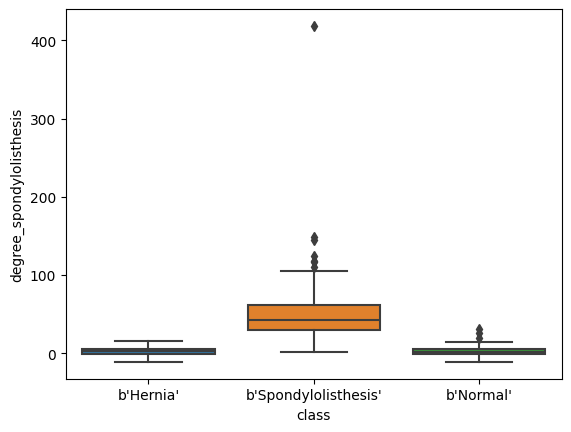

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x="class", y='degree_spondylolisthesis', data=df)      
plt.show()

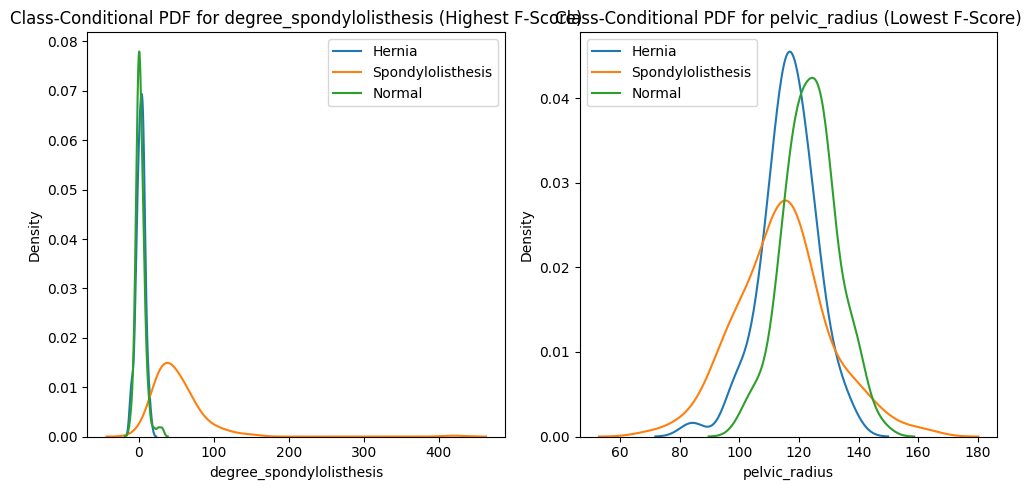

In [4]:
# max_value_index = df['degree_spondylolisthesis'].idxmax()
# df = df.drop(max_value_index)

highest_feature_name = highest_feature['Feature']
lowest_feature_name = lowest_feature['Feature']

plt.figure(figsize=(10, 5))

# Plot for the feature with the highest F-Score
plt.subplot(1, 2, 1)
for class_label in df['class'].unique():
    sns.kdeplot(data=df[df['class'] == class_label], x=highest_feature_name, label=class_label.decode('utf-8'))
plt.title(f'Class-Conditional PDF for {highest_feature_name} (Highest F-Score)')
plt.legend()

# Plot for the feature with the lowest F-Score
plt.subplot(1, 2, 2)
for class_label in df['class'].unique():
    sns.kdeplot(data=df[df['class'] == class_label], x=lowest_feature_name, label=class_label.decode('utf-8'))
plt.title(f'Class-Conditional PDF for {lowest_feature_name} (Lowest F-Score)')
plt.legend()

plt.tight_layout()
plt.show()

### 2)

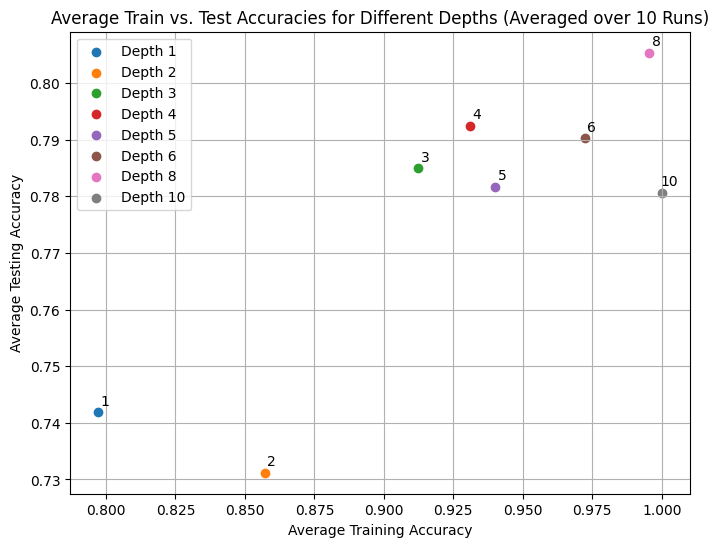

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics
from adjustText import adjust_text  # Import adjust_text function


depths = {1, 2, 3, 4, 5, 6, 8, 10}
num_runs = 10

average_train_accuracies = []
average_test_accuracies = []

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

for depth in depths:
    train_accuracies = []
    test_accuracies = []
    for _ in range(num_runs):
        predictor = tree.DecisionTreeClassifier(max_depth=depth, random_state=_)
        predictor.fit(X_train, y_train)

        # Training Accuracy
        y_train_pred = predictor.predict(X_train)
        train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
        train_accuracies.append(train_accuracy)

        # Testing Accuracy
        y_test_pred = predictor.predict(X_test)
        test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
        test_accuracies.append(test_accuracy)
    
    average_train_accuracy = sum(train_accuracies) / num_runs
    average_train_accuracies.append(average_train_accuracy)
    
    average_test_accuracy = sum(test_accuracies) / num_runs
    average_test_accuracies.append(average_test_accuracy)

# Create the scatter plot
plt.figure(figsize=(8, 6))
for i, depth in enumerate(depths):
    plt.scatter(average_train_accuracies[i], average_test_accuracies[i], label=f'Depth {depth}')
    plt.annotate(f'{depth}', (average_train_accuracies[i], average_test_accuracies[i]), textcoords='offset points', xytext=(5, 5), ha='center')

plt.title('Average Train vs. Test Accuracies for Different Depths (Averaged over 10 Runs)')
plt.xlabel('Average Training Accuracy')
plt.ylabel('Average Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()



### 3)

We see a general tendency for the training and testing accuracy to improve with bigger depths...

### 4)

#### i)

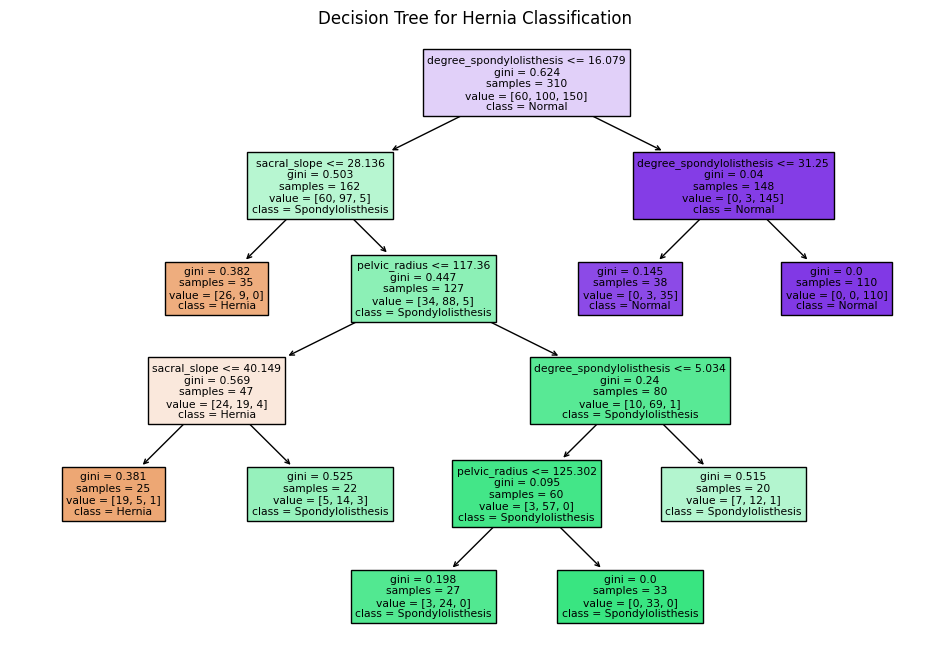

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

decision_tree = tree.DecisionTreeClassifier(max_depth=8, random_state=0, min_samples_leaf=20)

# Fit the decision tree on all available data
decision_tree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=y.unique())
plt.title("Decision Tree for Hernia Classification")
plt.show()

#### ii)